<a href="https://colab.research.google.com/github/scomarae/AreaCounter/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Homework_%D0%9A%D0%BE%D0%BD%D1%86%D0%B5%D0%BF%D1%86%D0%B8%D0%B8_ML_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import urllib.request
urllib.request.urlretrieve("https://api.selcdn.ru/v1/SEL_72086/prodLMS/files/share/phones_yHVTGz9.csv?filename=phones.csv", "phones.csv")

('phones.csv', <http.client.HTTPMessage at 0x793e13274880>)

# Основные концепции Machine Learning. Домашняя работа

In [2]:
### Тут нужно сделать импорты всех необходимых библиотек ###

In [3]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # для отрисовки 3D проекции

matplotlib.rc("font", size=18) # для увеличения шрифта подписей графиков

In [4]:
### Здесь требуется загрузить датасет phones.csv ###

In [5]:
phones = pd.read_csv("phones.csv")
phones.head()

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013


In [6]:
### Опционально: используя matplotlib, можно сделать визуализацию загруженного датасета ###

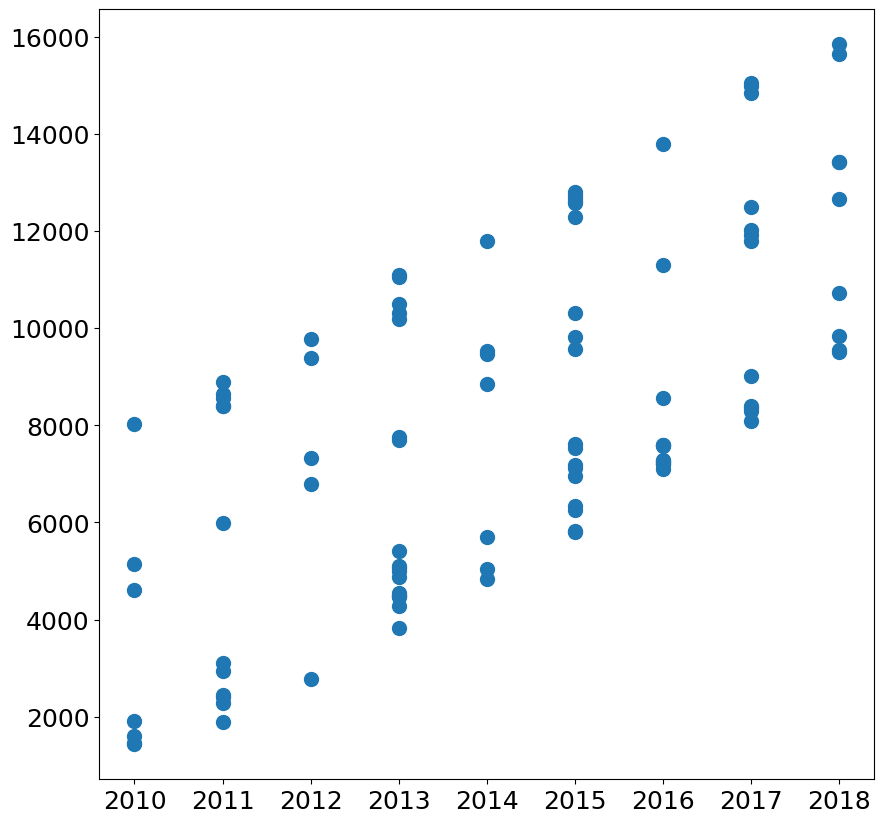

In [7]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(phones["year"], phones["price"], s=100)

# отображаем картинку
plt.show()

Задание 1: обучить модель регрессии

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[['disk', 'year']]
y = phones['price']

In [10]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [11]:
reg = LinearRegression().fit(X, y)

In [12]:
reg.predict(X[2:3])[0]

1720.3897027140483

In [13]:
d1, d2 = list(), list()
for x in np.linspace(min(phones["disk"]), max(phones["disk"]), 100):
    for y in np.linspace(min(phones["year"]), max(phones["year"]), 100):
        d1.append(x)
        d2.append(y)
d1 = np.array(d1).reshape(-1, 1)
d2 = np.array(d2).reshape(-1, 1)
p = reg.predict(np.concatenate([d1, d2], axis=1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [14]:
phones['year'].max()

2018

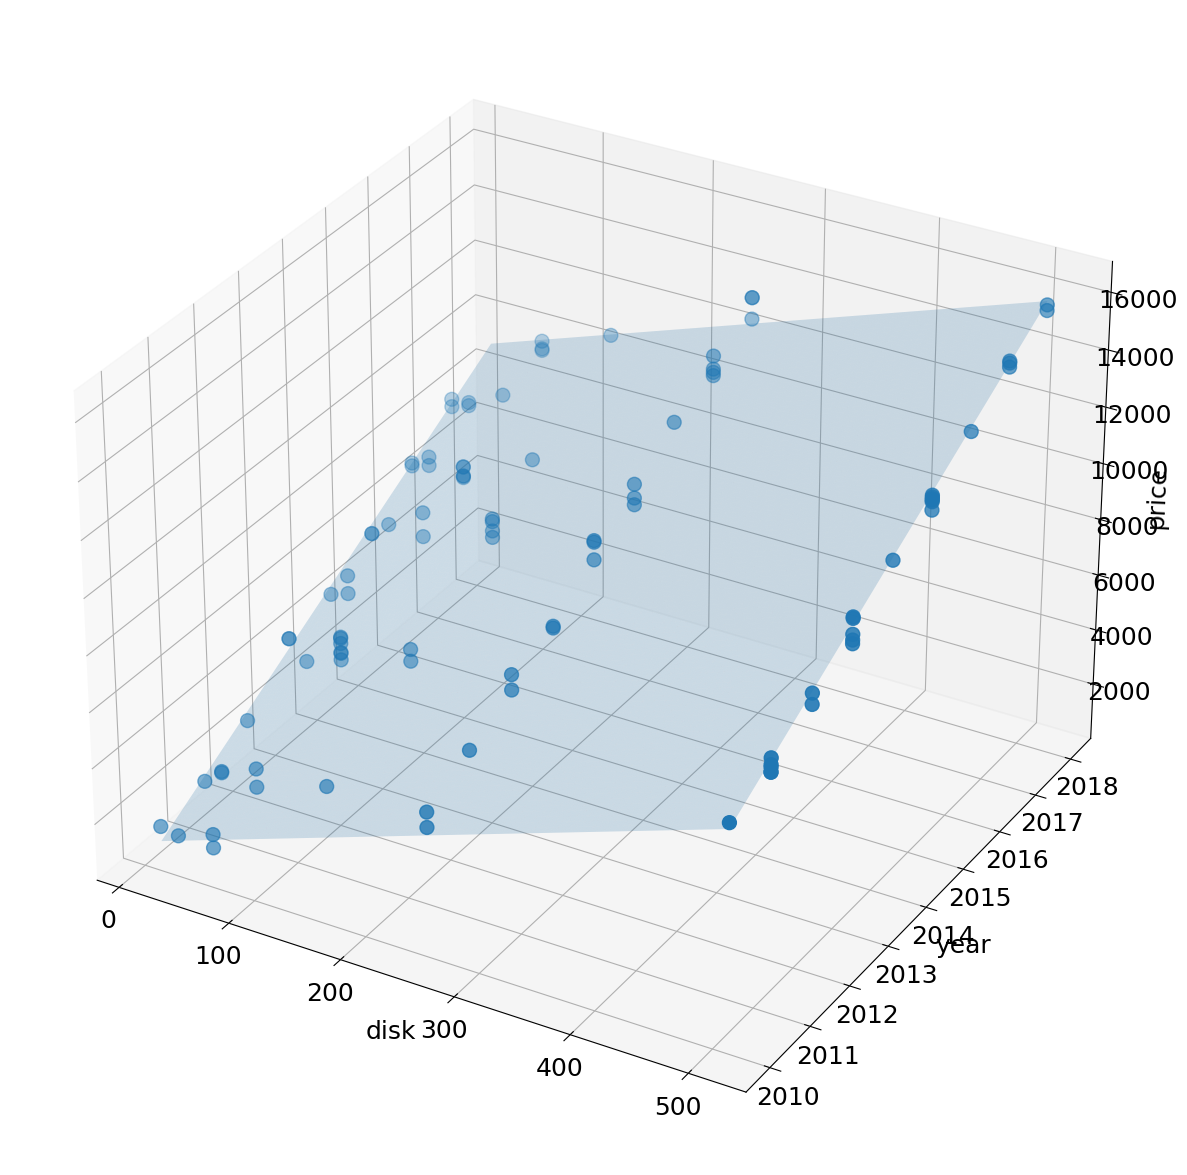

In [15]:
fig = plt.figure(figsize=(15, 15)) # создаем картинку
ax = plt.axes(projection="3d") # устанавливаем проекцию

# помещаем точки на график
ax.scatter(phones["disk"], phones["year"], phones["price"], s=100)

# помещаем предсказанные значения на график
ax.plot_trisurf(d1.ravel(), d2.ravel(), p.ravel(), alpha=0.2)


# называем оси
ax.set_xlabel("disk")
ax.set_ylabel("year")
ax.set_zlabel("price")


# изменяем позицию камеры и отрисовываем картинку
plt.show()

Задание 2: обучить модель классификации

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [17]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[['disk', 'year']]
y = phones['os']

In [18]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [19]:
cl = DecisionTreeClassifier().fit(X, y)

print(export_text(cl))

|--- feature_0 <= 192.00
|   |--- class: Android
|--- feature_0 >  192.00
|   |--- class: iOS



In [20]:
cl.predict(X[1:2])[0], y[1]

('Android', 'Android')

Задание 3: обучить модель кластеризации

In [21]:
from sklearn.cluster import KMeans

In [22]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[['disk', 'price']]

In [ ]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [32]:
clust = KMeans(n_clusters=3).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
[c1, c2, c3] = clust.cluster_centers_

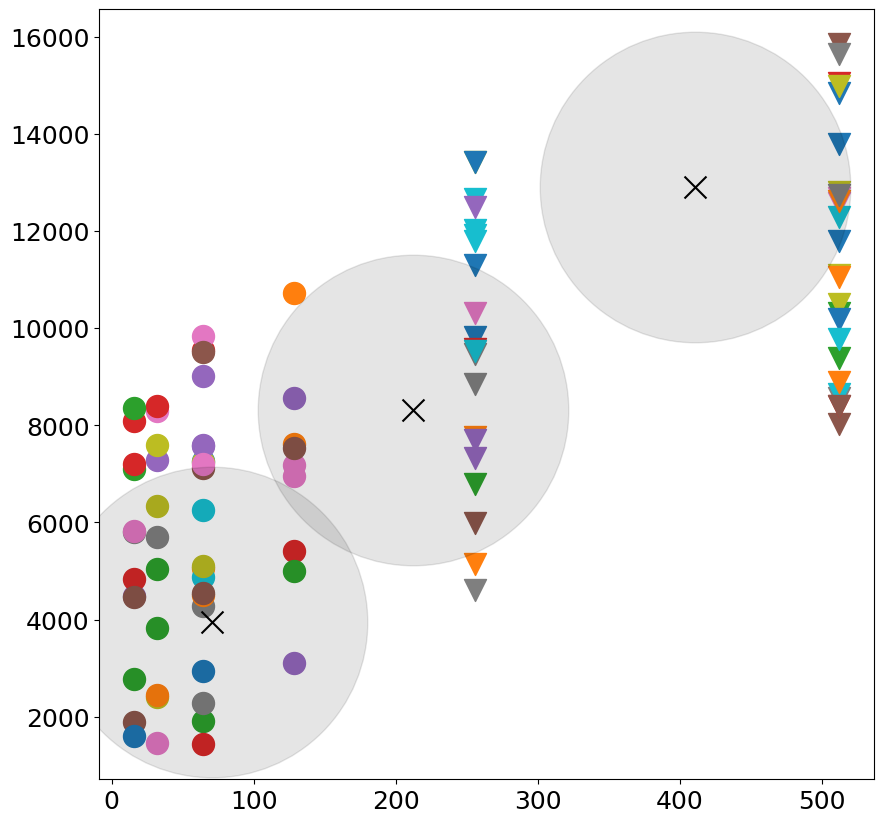

In [34]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"Android": "o", "iOS": "v"}
for d1, d2, l in zip(phones.disk, phones.price, phones.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])

# добавляем информацию о центрах кластеров
plt.scatter(c1[0], c1[1], s=250, marker="x", c="black")
plt.scatter(c1[0], c1[1], s=250 * 2e2, c="black", alpha=0.1)

plt.scatter(c2[0], c2[1], s=250, marker="x", c="black")
plt.scatter(c2[0], c2[1], s=250 * 2e2, c="black", alpha=0.1)


plt.scatter(c3[0], c3[1], s=250, marker="x", c="black")
plt.scatter(c3[0], c3[1], s=250 * 2e2, c="black", alpha=0.1)


# отображаем картинку
plt.show()